# Calcular si conviene en Bici, Auto, Transporte Público o Caminando

## Cargamos las librerias

In [9]:
import pandas as pd
import numpy as np
import geopandas as gpd
import osmnx as ox
from shapely.geometry import Point,Polygon,LineString

import googlemaps
from datetime import datetime
import time

import matplotlib.pyplot as plt; plt.rcdefaults()
%matplotlib inline

from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))

## Parámetros

In [47]:
ciudad = "Buenos Aires,Argentina"
APIkey = 'KEY'
gmaps = googlemaps.Client(key=APIkey)

## Funcion para consultar GMaps

In [40]:
def query_gmaps(O, D, mode,depart,gmaps=gmaps):
    '''
    This functions takes 
    a gmaps instance
    coordinates for Origin and Destination 
    O = (origin.y,origin.x)
    D = (destination.y,destination.x)
    a mode: bicycling o driving
    and a departure time
    and returns a google distance matrix api
    '''
    out = gmaps.distance_matrix(
        origins = O,
        destinations = D,
        language=None, avoid=None,
        mode=mode,
        units = 'metric',
        departure_time = depart,
        arrival_time=None, transit_mode=None,
        transit_routing_preference=None,
        traffic_model="best_guess",
        region = None)
    return out

## Origen y Destino

In [41]:
casa = "Avenida Rivadavia 1234"

In [42]:
destino = "Club Ferrocarril Oeste"

In [43]:
hsSalida = datetime.now()

## Consulta con cada medio de transporte

In [44]:
bici = query_gmaps(O = casa + ", " + ciudad, D = destino + ", " + ciudad, mode = 'bicycling',depart = hsSalida) 
auto = query_gmaps(O = casa + ", " + ciudad, D = destino + ", " + ciudad, mode = 'driving',depart = hsSalida) 
publico = query_gmaps(O = casa + ", " + ciudad, D = destino + ", " + ciudad, mode = 'transit',depart = hsSalida) 
caminando = query_gmaps(O = casa + ", " + ciudad, D = destino + ", " + ciudad, mode = 'walking',depart = hsSalida) 

tiempoBiciLetras = bici["rows"][0]["elements"][0]["duration"]["text"]
tiempoBiciValor = bici["rows"][0]["elements"][0]["duration"]["value"]

tiempoAutoLetras = auto["rows"][0]["elements"][0]["duration"]["text"]
tiempoAutoValor = auto["rows"][0]["elements"][0]["duration"]["value"]

tiempoPublicoLetras = publico["rows"][0]["elements"][0]["duration"]["text"]
tiempoPublicoValor = publico["rows"][0]["elements"][0]["duration"]["value"]

tiempoCaminandoLetras = caminando["rows"][0]["elements"][0]["duration"]["text"]
tiempoCaminandoValor = caminando["rows"][0]["elements"][0]["duration"]["value"]

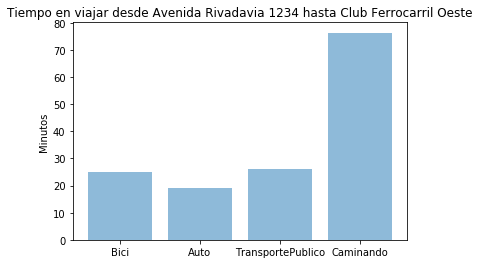

En bici: 25 mins
En auto: 19 mins
En transporte público: 26 mins
Caminando: 1 hour 16 mins


<span style='color:red'>Conviene en auto</span>

In [45]:
objects = ('Bici', 'Auto', 'TransportePublico', 'Caminando')
y_pos = np.arange(len(objects))
performance = [tiempoBiciValor / 60, tiempoAutoValor / 60, tiempoPublicoValor / 60, tiempoCaminandoValor / 60]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Minutos')
plt.title('Tiempo en viajar desde ' + casa + ' hasta ' + destino)

plt.show()

print ("En bici: " + tiempoBiciLetras)
print ("En auto: " + tiempoAutoLetras)
print ("En transporte público: " + tiempoPublicoLetras)
print ("Caminando: " + tiempoCaminandoLetras)

if(tiempoBiciValor <= tiempoAutoValor and tiempoBiciValor <= tiempoPublicoValor and tiempoBiciValor <= tiempoCaminandoValor):
    printmd("<span style='color:red'>Conviene en Bici!</span>")
else:
    if(tiempoAutoValor <= tiempoBiciValor and tiempoAutoValor <= tiempoPublicoValor and tiempoAutoValor <= tiempoCaminandoValor):
        printmd("<span style='color:red'>Conviene en auto</span>")
    else:
        if(tiempoCaminandoValor <= tiempoBiciValor and tiempoCaminandoValor <= tiempoAutoValor and tiempoCaminandoValor <= tiempoCaminandoValor):
            printmd("<span style='color:red'>Conviene caminando</span>")
        else:
            printmd("<span style='color:red'>Conviene en transporte público</span>")